In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


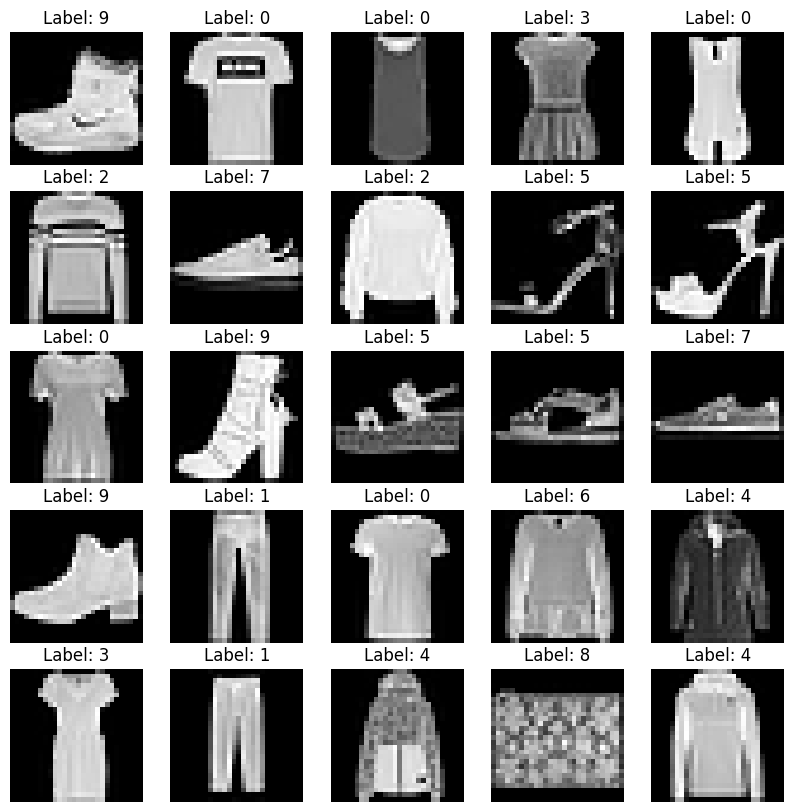

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7368 - loss: 0.7444 - val_accuracy: 0.8449 - val_loss: 0.4271
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8392 - loss: 0.4382 - val_accuracy: 0.8552 - val_loss: 0.3971
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8518 - loss: 0.4037 - val_accuracy: 0.8545 - val_loss: 0.4022
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8648 - loss: 0.3726 - val_accuracy: 0.8654 - val_loss: 0.3732
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8695 - loss: 0.3592 - val_accuracy: 0.8726 - val_loss: 0.3515
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8728 - loss: 0.3431 - val_accuracy: 0.8723 - val_loss: 0.3467
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8789 - loss: 0.3291 - val_accuracy: 0.8682 - val_loss: 0.3602
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8794 - loss: 0.324

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8814 - loss: 0.3296
Test Accuracy: 88.15%


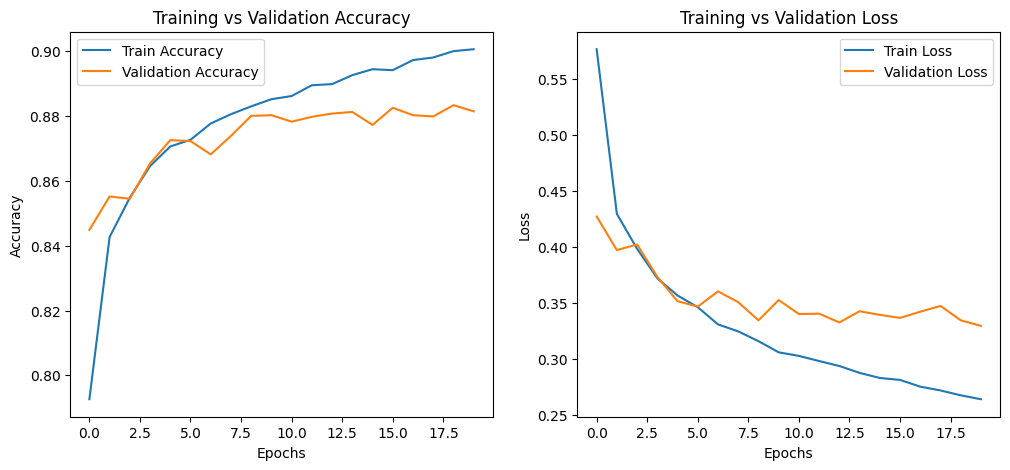

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.80      0.78      1000
       Dress       0.86      0.91      0.88      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.73      0.63      0.68      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

